<a href="https://colab.research.google.com/github/Nibaron/Myclassrountineapp/blob/master/1603104(LAB_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Entrophy Calculation**

 **ORIGINAL IMAGE**

In [ ]:
#Import Libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.io import imread,imshow,imsave
from PIL import Image 
import PIL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


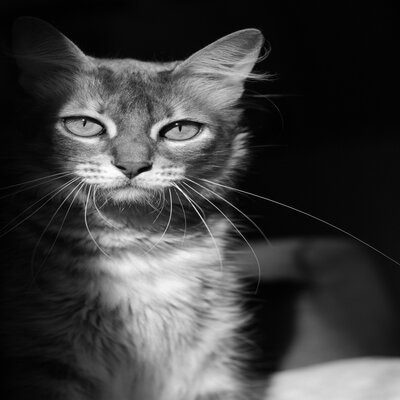

In [43]:
#Import Image
img = cv2.imread('/content/drive/MyDrive/DIP/cat.jpg',0)
cv2_imshow(img)
bit = os.stat('/content/drive/MyDrive/DIP/cat.jpg').st_size
img.shape
[row,col]=img.shape

**BIT RATE & ENTROPHY**

In [23]:
#Bit-rate function

def bitrate(width,height,bit):
    return (bit*8)/(height*width)

In [36]:
#Entropy function

def entropy(im):
    p = np.array([(im==v).sum() for v in range(256)])
    p = p/p.sum()
    
    e = -(p[p>0]*np.log2(p[p>0])).sum()
    return e

In [44]:
#Calculating Bitrate & Entropy
print("\nThe Entropy of ORIGINAL image is: ",entropy(img))
print("The bit rate of ORIGINAL image is: ",bitrate(row,col,bit)," bits/pixel")


The Entropy of ORIGINAL image is:  6.90718965309278
The bit rate of ORIGINAL image is:  1.58155  bits/pixel


**Different Prediction**

**1.A (LEFT) PREDICTION**




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


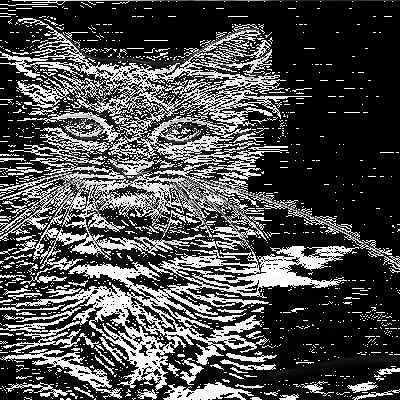


For Prediction A
The Entropy of Predicted image:  4.228021286931034
The bit rate of Predicted image is:  6.5871  bits/pixel


In [46]:
#For A (Left) Prediction

Predictedimg1 = np.zeros([row,col])

for i in range(row):
  for j in range(col):
    if(i == 1):
      if(j == 1):
        predict = 0;
      else:
        predict = img[i,j-1];
    else:
      predict = img[i-1,j];
    Predictedimg1[i,j] = img[i,j] - predict;

[row1,col1] = Predictedimg1.shape

cv2.imwrite ('/content/drive/MyDrive/DIP/Predictedimg1.jpg', Predictedimg1)
bit1 = os.stat('/content/drive/MyDrive/DIP/Predictedimg1.jpg').st_size

cv2_imshow(Predictedimg1)

print("\nFor Prediction A")
print("The Entropy of Predicted image: ",entropy(Predictedimg1))
print("The bit rate of Predicted image is: ",bitrate(row1,col1,bit1)," bits/pixel")

**2.B (Upper) Prediction**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


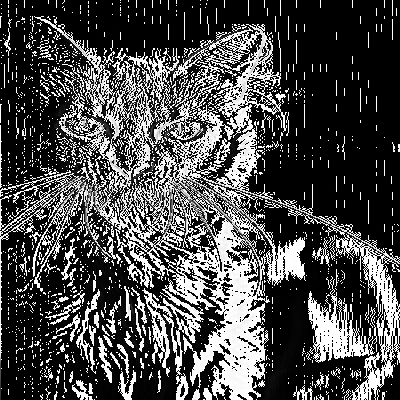


For Prediction - B
The Entropy of Predicted image:  3.9322756182570737
The bit rate of Predicted image is:  6.63595  bits/pixel


In [47]:
#For B (Upper) Prediction

Predictedimg2 = np.zeros([row,col])

for i in range(row):
  for j in range(col):
    if(j == 1):
      if(i == 1):
        predict = 0;
      else:
        predict = img[i-1,j];
    else:
      predict = img[i,j-1];
    Predictedimg2[i,j] = img[i,j] - predict;

[row2,col2] = Predictedimg2.shape

cv2.imwrite ('/content/drive/MyDrive/DIP/Predictedimg2.jpg', Predictedimg2)
bit2 = os.stat('/content/drive/MyDrive/DIP/Predictedimg2.jpg').st_size

cv2_imshow(Predictedimg2)

print("\nFor Prediction - B")
print("The Entropy of Predicted image: ",entropy(Predictedimg2))
print("The bit rate of Predicted image is: ",bitrate(row2,col2,bit2)," bits/pixel")

**3. C (Upper Left) Prediction**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


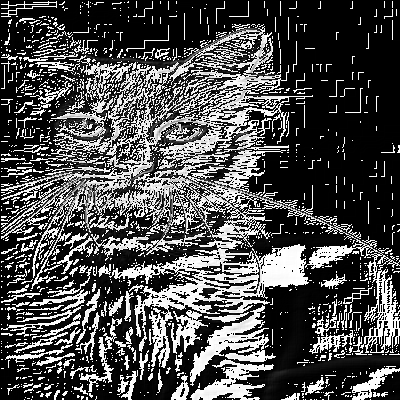


For Prediction - C
The Entropy of Predicted image:  4.453249653638784
The bit rate of Predicted image is:  7.1524  bits/pixel


In [48]:
#For C (Upper Left) Prediction

Predictedimg3 = np.zeros([row,col])

for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img [i-1,j-1])
    Predictedimg3[i,j] = img[i,j] - predict;

[row3,col3] = Predictedimg3.shape

cv2.imwrite ('/content/drive/MyDrive/DIP/Predictedimg3.jpg', Predictedimg3)
bit3 = os.stat('/content/drive/MyDrive/DIP/Predictedimg3.jpg').st_size

cv2_imshow(Predictedimg3)
print("\nFor Prediction - C")
print("The Entropy of Predicted image: ",entropy(Predictedimg3))
print("The bit rate of Predicted image is: ",bitrate(row3,col3,bit3)," bits/pixel")

**4. A+B-C Prediction**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


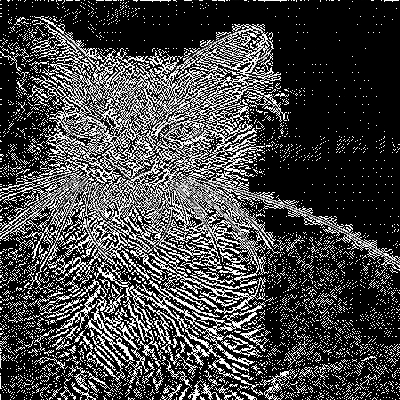


For  Prediction - (A+B-C)
The Entropy of Predicted image:  3.5617055338909513
The bit rate of Predicted image is:  7.73305  bits/pixel


In [50]:
#For A+B-C Prediction

Predictedimg4 = np.zeros([row,col])

for i in range(row):
  for j in range(col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i,j-1]+ img[i-1,j] - img[i-1,j-1])
    Predictedimg4[i,j] = img[i,j] - predict;

[row4,col4] = Predictedimg4.shape

cv2.imwrite ('/content/drive/MyDrive/DIP/PredictedImg4.jpg', Predictedimg4)
bit4 = os.stat('/content/drive/MyDrive/DIP/PredictedImg4.jpg').st_size

cv2_imshow(Predictedimg4)

print("\nFor  Prediction - (A+B-C)")
print("The Entropy of Predicted image: ",entropy(Predictedimg4))
print("The bit rate of Predicted image is: ",bitrate(row4,col4,bit4)," bits/pixel")


**5. A + (B – C)/2 Prediction**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


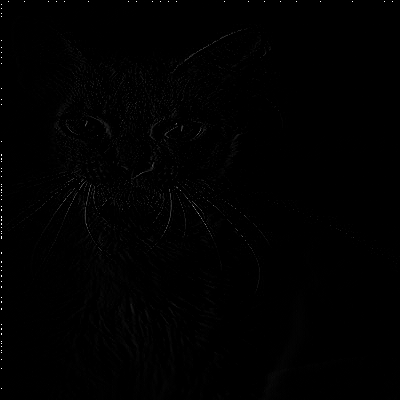


For  Prediction- (A + (B – C) / 2)
The Entropy of Predicted image:  1.570722085932095
The bit rate of Predicted image is:  1.1898  bits/pixel


In [51]:
#For A + (B – C)/2 Prediction

Predictedimg5 = np.zeros([row,col])

for i in range(1,row):
  for j in range(1,col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i,j-1]+ (img[i-1,j] - img[i-1,j-1])/2)
    Predictedimg5[i,j] = img[i,j] - predict;

[row5,col5] = Predictedimg5.shape

cv2.imwrite ('/content/drive/MyDrive/DIP/PredictedImg5.jpg', Predictedimg5)
bit5 = os.stat('/content/drive/MyDrive/DIP/PredictedImg5.jpg').st_size

cv2_imshow(Predictedimg5)

print("\nFor  Prediction- (A + (B – C) / 2)")
print("The Entropy of Predicted image: ",entropy(Predictedimg5))
print("The bit rate of Predicted image is: ",bitrate(row5,col5,bit5)," bits/pixel")

**6. B + (A – C)/2 Prediction**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


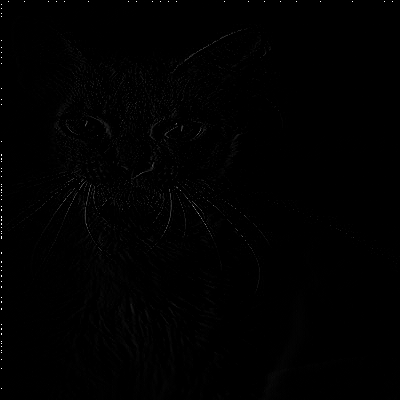


For  Prediction- (B + (A – C) / 2)
The Entropy of Predicted image:  1.570722085932095
The bit rate of Predicted image is:  1.1898  bits/pixel


In [54]:
#For B + (A – C)/2 Prediction

Predictedimg6 = np.zeros([row,col])

for i in range(1,row):
  for j in range(1,col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i,j-1]+ (img[i-1,j] - img[i-1,j-1])/2)
    Predictedimg6[i,j] = img[i,j] - predict;

[row6,col6] = Predictedimg6.shape

cv2.imwrite ('/content/drive/MyDrive/DIP/PredictedImg6.jpg', Predictedimg6)
bit6 = os.stat('/content/drive/MyDrive/DIP/PredictedImg6.jpg').st_size

cv2_imshow(Predictedimg6)

print("\nFor  Prediction- (B + (A – C) / 2)")
print("The Entropy of Predicted image: ",entropy(Predictedimg6))
print("The bit rate of Predicted image is: ",bitrate(row6,col6,bit6)," bits/pixel")

**7.  A+B/2 Prediction**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


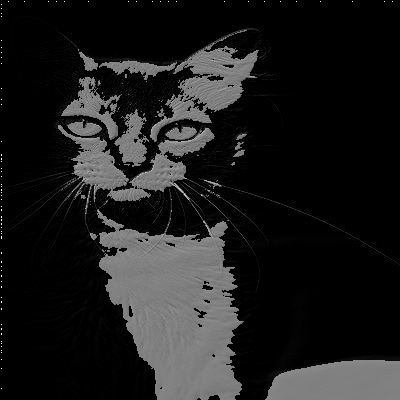


For Prediction- (A+B / 2 )
The Entropy of Predicted image:  3.186732962214953
The bit rate of Predicted image is:  2.0653  bits/pixel


In [55]:
# For A+B/2 Prediction

Predictedimg7 = np.zeros([row,col])

for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i-1,j]+ img[i,j-1])/2
    Predictedimg7[i,j] = img[i,j] - predict;

[row7,col7] = Predictedimg7.shape

cv2.imwrite ('/content/drive/MyDrive/DIP/PredictedImg7.jpg', Predictedimg7)
bit7 = os.stat('/content/drive/MyDrive/DIP/PredictedImg7.jpg').st_size

cv2_imshow(Predictedimg7)

print("\nFor Prediction- (A+B / 2 )")
print("The Entropy of Predicted image: ",entropy(Predictedimg7))
print("The bit rate of Predicted image is: ",bitrate(row7,col7,bit7)," bits/pixel")


**8. LOCO-I**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


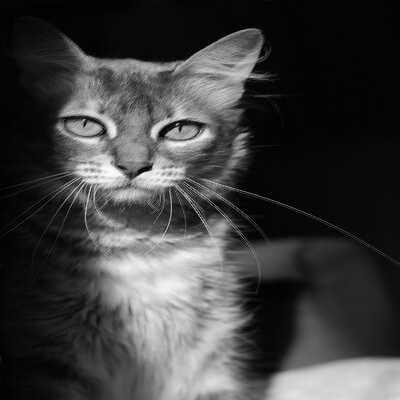


For LOCO-I-
The Entropy of Predicted image:  6.910016838747248
The bit rate of Predicted image is:  1.9667  bits/pixel


In [56]:
# For LOCO-I

LocoI = np.zeros([row,col])

for i in range(row):
  for j in range(col):
    A = img[i-1,j]
    B = img[i,j-1]
    C = img[i-1,j-1]
    if(C >= max(A,B)):
      LocoI[i,j] = min(A, B)
    elif(C <= min(A,B)):
      LocoI[i,j] = max(A,B)
    else:
      LocoI[i,j] = A + B - C

[rowl,coll] = LocoI.shape

cv2.imwrite ('/content/drive/MyDrive/DIP/Loco-I.jpg', LocoI)
bitl = os.stat('/content/drive/MyDrive/DIP/Loco-I.jpg').st_size

cv2_imshow(LocoI)

print("\nFor LOCO-I-")
print("The Entropy of Predicted image: ",entropy(LocoI))
print("The bit rate of Predicted image is: ",bitrate(rowl,coll,bitl)," bits/pixel")

**Comparison Table:**

In [72]:
print("\nThe Entropy of ORIGINAL image is: ",entropy(img))
print("The bit rate of ORIGINAL image is: ",bitrate(row,col,bit)," bits/pixel\n")
print("The Entropy for A Prediction: ",entropy(Predictedimg1))
print("The Entropy for B Prediction: ",entropy(Predictedimg2))
print("The Entropy for C Prediction: ",entropy(Predictedimg3))
print("The Entropy for   (A+B-C)   : ",entropy(Predictedimg4))
print("The Entropy for (A+(B–C)/2) : ",entropy(Predictedimg5))
print("The Entropy for (B+(A–C)/2) : ",entropy(Predictedimg6))
print("The Entropy for (A+B/2)     : ",entropy(Predictedimg7))
print("The Entropy for LOCO-I      : ",entropy(LocoI))
print("\nThe bit rate for A Prediction: ",bitrate(row1,col1,bit1),"bits/pixel")
print("The bit rate for B Prediction: ",bitrate(row2,col2,bit2)," bits/pixel")
print("The bit rate for C Prediction: ",bitrate(row3,col3,bit3)," bits/pixel")
print("The bit rate for   (A+B-C)   : ",bitrate(row4,col4,bit4)," bits/pixel")
print("The bit rate for (A+(B–C)/2) : ",bitrate(row5,col5,bit5)," bits/pixel")
print("The bit rate for (B+(A–C)/2) : ",bitrate(row6,col6,bit6)," bits/pixel")
print("The bit rate for (A+B/2)     : ",bitrate(row7,col7,bit7)," bits/pixel")
print("The bit rate for LOCO-I      : ",bitrate(rowl,coll,bitl)," bits/pixel")


The Entropy of ORIGINAL image is:  6.90718965309278
The bit rate of ORIGINAL image is:  1.58155  bits/pixel

The Entropy for A Prediction:  4.228021286931034
The Entropy for B Prediction:  3.9322756182570737
The Entropy for C Prediction:  4.453249653638784
The Entropy for   (A+B-C)   :  3.5617055338909513
The Entropy for (A+(B–C)/2) :  1.570722085932095
The Entropy for (B+(A–C)/2) :  1.570722085932095
The Entropy for (A+B/2)     :  3.186732962214953
The Entropy for LOCO-I      :  6.910016838747248

The bit rate for A Prediction:  6.5871 bits/pixel
The bit rate for B Prediction:  6.63595  bits/pixel
The bit rate for C Prediction:  7.1524  bits/pixel
The bit rate for   (A+B-C)   :  7.73305  bits/pixel
The bit rate for (A+(B–C)/2) :  1.1898  bits/pixel
The bit rate for (B+(A–C)/2) :  1.1898  bits/pixel
The bit rate for (A+B/2)     :  2.0653  bits/pixel
The bit rate for LOCO-I      :  1.9667  bits/pixel
